In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
# Step 2:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [4]:
emotion_dataset_path = '/content/drive/MyDrive/Data-Science-Projects/Facial-Emotion-andBody-Language/Datasets/FINAL-NewbalancedFE'

In [5]:
# Step 3: Define the function to load the dataset
def load_images_from_folder(folder):
    images = []
    labels = []
    for class_name in os.listdir(folder):
        class_folder = os.path.join(folder, class_name)
        if os.path.isdir(class_folder):
            for filename in os.listdir(class_folder):
                img_path = os.path.join(class_folder, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (224, 224))
                    images.append(img)
                    labels.append(class_name)
    return np.array(images), np.array(labels)

In [6]:
# Step 4: Load the facial emotion dataset
X_emotion, y_emotion = load_images_from_folder(emotion_dataset_path)

In [7]:
# Step 5: Dynamically fetch folder names and assign labels
emotion_labels = {folder_name: idx for idx, folder_name in enumerate(sorted(os.listdir(emotion_dataset_path)))}

y_emotion = np.array([emotion_labels[label] for label in y_emotion])

print("Emotion Labels Mapping:", emotion_labels)


Emotion Labels Mapping: {'Angary': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3, 'Neutral': 4, 'Sad': 5, 'Surprised': 6}


In [8]:
# Step 6: Normalize the images
X_emotion = X_emotion / 255.0

In [ ]:
# Step 7: Split the dataset into training, validation, and test sets
X_train_emotion, X_temp_emotion, y_train_emotion, y_temp_emotion = train_test_split(X_emotion, y_emotion, test_size=0.3, random_state=42)
X_val_emotion, X_test_emotion, y_val_emotion, y_test_emotion = train_test_split(X_temp_emotion, y_temp_emotion, test_size=0.5, random_state=42)

In [ ]:
print("Facial Emotion Training set shape:", X_train_emotion.shape)
print("Facial Emotion Validation set shape:", X_val_emotion.shape)
print("Facial Emotion Test set shape:", X_test_emotion.shape)

FINAL

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [4]:
emotion_dataset_path = '/content/drive/MyDrive/Data-Science-Projects/Facial-Emotion-andBody-Language/Datasets/FINAL-NewbalancedFE'

In [5]:
emotion_labels = {folder_name: idx for idx, folder_name in enumerate(sorted(os.listdir(emotion_dataset_path)))}
print("Emotion Labels Mapping:", emotion_labels)

Emotion Labels Mapping: {'Angary': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3, 'Neutral': 4, 'Sad': 5, 'Surprised': 6}


In [6]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3
)

In [7]:
train_generator = datagen.flow_from_directory(
    emotion_dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

Found 17030 images belonging to 7 classes.


In [8]:
validation_generator = datagen.flow_from_directory(
    emotion_dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

Found 7295 images belonging to 7 classes.


In [10]:
def build_baseline_cnn(input_shape):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(len(emotion_labels), activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

In [11]:
baseline_emotion_cnn_model = build_baseline_cnn(input_shape=(224, 224, 3))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
history_emotion_cnn = baseline_emotion_cnn_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 73s 136ms/step - accuracy: 0.7477 - loss: 0.6878 - val_accuracy: 0.4159 - val_loss: 1.9901
Epoch 2/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 0s 91us/step - accuracy: 0.8125 - loss: 0.5656 - val_accuracy: 0.3548 - val_loss: 2.2541
Epoch 3/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 72s 133ms/step - accuracy: 0.7844 - loss: 0.5839 - val_accuracy: 0.4174 - val_loss: 2.0575
Epoch 4/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 0s 88us/step - accuracy: 0.7812 - loss: 0.6593 - val_accuracy: 0.3548 - val_loss: 1.9346
Epoch 5/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 70s 131ms/step - accuracy: 0.8169 - loss: 0.4886 - val_accuracy: 0.4202 - val_loss: 2.0760
Epoch 6/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 0s 82us/step - accuracy: 0.8438 - loss: 0.4601 - val_accuracy: 0.4839 - val_loss: 1.9470
Epoch 7/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 71s 131ms/step - accuracy: 0.8371 - loss: 0.4337 - val_accuracy: 0.4200 - val_loss: 2.2219
Epoch 8/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 0s 75us/step - accuracy: 0.8125 - loss: 0.3692 - 

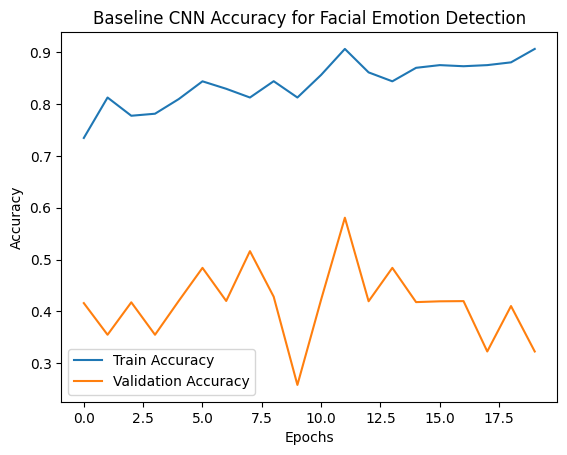

In [14]:

plt.plot(history_emotion_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_emotion_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Baseline CNN Accuracy for Facial Emotion Detection')
plt.show()

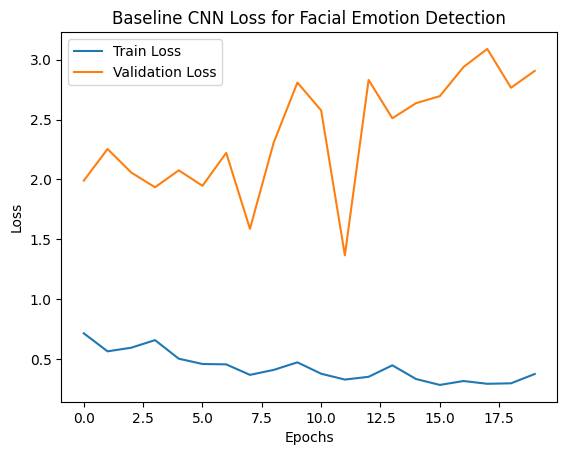

In [15]:

plt.plot(history_emotion_cnn.history['loss'], label='Train Loss')
plt.plot(history_emotion_cnn.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Baseline CNN Loss for Facial Emotion Detection')
plt.show()

In [16]:

test_loss, test_accuracy = baseline_emotion_cnn_model.evaluate(validation_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

228/228 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - accuracy: 0.3977 - loss: 2.7721
Test Accuracy: 41.00%


In [17]:
y_pred_emotion = baseline_emotion_cnn_model.predict(validation_generator)
y_pred_emotion = np.argmax(y_pred_emotion, axis=1)

228/228 ━━━━━━━━━━━━━━━━━━━━ 22s 96ms/step


In [18]:

y_true_emotion = validation_generator.classes

print("Classification Report:\n", classification_report(y_true_emotion, y_pred_emotion, target_names=emotion_labels.keys()))

print("Confusion Matrix:\n", confusion_matrix(y_true_emotion, y_pred_emotion))

Classification Report:
               precision    recall  f1-score   support

      Angary       0.13      0.10      0.11       900
     Disgust       0.14      0.15      0.15      1133
        Fear       0.15      0.13      0.14      1159
       Happy       0.15      0.13      0.14      1014
     Neutral       0.15      0.19      0.17      1150
         Sad       0.15      0.17      0.16       978
   Surprised       0.14      0.15      0.15       961

    accuracy                           0.15      7295
   macro avg       0.15      0.15      0.14      7295
weighted avg       0.15      0.15      0.15      7295

Confusion Matrix:
 [[ 91 155 125  94 185 122 128]
 [108 167 148 143 231 171 165]
 [125 212 156 139 207 173 147]
 [ 79 158 141 129 220 149 138]
 [106 190 175 147 215 176 141]
 [ 88 147 147  94 193 164 145]
 [ 95 130 128 122 191 150 145]]


Trying Improve

In [24]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [25]:
def build_regularized_cnn(input_shape):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))

    model.add(Flatten())

    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))

    model.add(Dense(len(emotion_labels), activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

In [26]:
regularized_cnn_model = build_regularized_cnn(input_shape=(224, 224, 3))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
history_regularized_cnn = regularized_cnn_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 84s 144ms/step - accuracy: 0.1553 - loss: 9.1864 - val_accuracy: 0.1470 - val_loss: 8.6374
Epoch 2/20
  1/532 ━━━━━━━━━━━━━━━━━━━━ 41s 78ms/step - accuracy: 0.1875 - loss: 2.7192

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 950us/step - accuracy: 0.1875 - loss: 2.7192 - val_accuracy: 0.0645 - val_loss: 11.1530
Epoch 3/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 73s 136ms/step - accuracy: 0.1586 - loss: 7.7740 - val_accuracy: 0.1326 - val_loss: 2.8598
Epoch 4/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 0s 65us/step - accuracy: 0.1562 - loss: 2.4797 - val_accuracy: 0.1935 - val_loss: 2.6989
Epoch 5/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 74s 138ms/step - accuracy: 0.1583 - loss: 2.2830 - val_accuracy: 0.1408 - val_loss: 2.0801
Epoch 6/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 0s 63us/step - accuracy: 0.0312 - loss: 2.0347 - val_accuracy: 0.1613 - val_loss: 2.0640
Epoch 7/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 72s 134ms/step - accuracy: 0.1578 - loss: 2.0103 - val_accuracy: 0.1425 - val_loss: 1.9712
Epoch 8/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 0s 66us/step - accuracy: 0.1562 - loss: 1.9624 - val_accuracy: 0.1290 - val_loss: 1.9523
Epoch 9/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 72s 134ms/step - accuracy: 0.1599 - loss: 2.6156 - val_accur

In [29]:
def build_fine_tuned_vgg(input_shape):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False

    model = Sequential([
        base_model,
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(len(emotion_labels), activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [30]:
vgg_model = build_fine_tuned_vgg(input_shape=(224, 224, 3))
history_vgg = vgg_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 113s 185ms/step - accuracy: 0.1511 - loss: 2.0150 - val_accuracy: 0.1589 - val_loss: 1.9421
Epoch 2/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.1562 - loss: 1.9372 - val_accuracy: 0.1935 - val_loss: 1.9222
Epoch 3/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 95s 178ms/step - accuracy: 0.1567 - loss: 1.9409 - val_accuracy: 0.1587 - val_loss: 1.9417
Epoch 4/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step - accuracy: 0.2188 - loss: 1.9302 - val_accuracy: 0.1935 - val_loss: 1.9388
Epoch 5/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 98s 183ms/step - accuracy: 0.1512 - loss: 1.9414 - val_accuracy: 0.1590 - val_loss: 1.9417
Epoch 6/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step - accuracy: 0.2500 - loss: 1.9443 - val_accuracy: 0.1290 - val_loss: 1.9258
Epoch 7/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 99s 185ms/step - accuracy: 0.1569 - loss: 1.9411 - val_accuracy: 0.1589 - val_loss: 1.9417
Epoch 8/10
532/532 ━━━━━━━━━━━━━━━

In [ ]:

# cnn_emotion_model_save_path = '/content/drive/MyDrive/Data-Science-Projects/Facial-Emotion-andBody-Language/Models/emotion_cnn_model.h5'
# baseline_emotion_cnn_model.save(cnn_emotion_model_save_path)
# print("Baseline CNN model for facial emotion saved successfully!")

Plan:
Use a Pre-trained Model (VGG16):  use VGG16 as the backbone, but with the final layers re-trained for your specific classification task.
Add Fine-tuning:  unfreeze some of the deeper layers of the pre-trained network and allow them to fine-tune for the facial emotion dataset.
Use Data Augmentation: To generalize the model better, use data augmentation.
Regularization: use dropout and L2 regularization to avoid overfitting.


In [32]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [33]:
train_generator = datagen.flow_from_directory(
    emotion_dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='training'

Found 17030 images belonging to 7 classes.


In [34]:
validation_generator = datagen.flow_from_directory(
    emotion_dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

Found 7295 images belonging to 7 classes.


In [35]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [36]:
base_model.trainable = False

In [37]:
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    BatchNormalization(),
    Dense(len(train_generator.class_indices), activation='softmax')
])

In [38]:
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [39]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


532/532 ━━━━━━━━━━━━━━━━━━━━ 347s 565ms/step - accuracy: 0.1843 - loss: 2.4842 - val_accuracy: 0.2053 - val_loss: 2.1163
Epoch 2/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0938 - loss: 2.2907 - val_accuracy: 0.3548 - val_loss: 2.0925
Epoch 3/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 299s 557ms/step - accuracy: 0.2153 - loss: 2.1139 - val_accuracy: 0.2551 - val_loss: 2.0736
Epoch 4/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.1562 - loss: 2.1324 - val_accuracy: 0.2581 - val_loss: 2.1104
Epoch 5/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 298s 554ms/step - accuracy: 0.2111 - loss: 2.0563 - val_accuracy: 0.2033 - val_loss: 2.0295
Epoch 6/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.2188 - loss: 2.0027 - val_accuracy: 0.1613 - val_loss: 2.0151
Epoch 7/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 315s 586ms/step - accuracy: 0.2098 - loss: 2.0245 - val_accuracy: 0.1980 - val_loss: 2.0202
Epoch 8/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.1562 - loss: 2.0513 - val_a

In [40]:
base_model.trainable = True

In [41]:
fine_tune_optimizer = Adam(learning_rate=1e-5)
model.compile(optimizer=fine_tune_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [44]:
fine_tune_history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/50
532/532 ━━━━━━━━━━━━━━━━━━━━ 349s 649ms/step - accuracy: 0.5830 - loss: 1.2580 - val_accuracy: 0.5619 - val_loss: 1.2811
Epoch 2/50
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 257us/step - accuracy: 0.5625 - loss: 1.2961 - val_accuracy: 0.5161 - val_loss: 1.3659
Epoch 3/50
532/532 ━━━━━━━━━━━━━━━━━━━━ 354s 659ms/step - accuracy: 0.6025 - loss: 1.2200 - val_accuracy: 0.5915 - val_loss: 1.2415
Epoch 4/50
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 251us/step - accuracy: 0.5938 - loss: 1.2686 - val_accuracy: 0.5484 - val_loss: 1.2057
Epoch 5/50
532/532 ━━━━━━━━━━━━━━━━━━━━ 355s 662ms/step - accuracy: 0.5982 - loss: 1.2195 - val_accuracy: 0.5931 - val_loss: 1.2400
Epoch 6/50
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 249us/step - accuracy: 0.6875 - loss: 1.1907 - val_accuracy: 0.7097 - val_loss: 1.0537
Epoch 7/50
532/532 ━━━━━━━━━━━━━━━━━━━━ 355s 661ms/step - accuracy: 0.6087 - loss: 1.2065 - val_accuracy: 0.5796 - val_loss: 1.2503
Epoch 8/50
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 256us/step - accuracy: 0.6562 - loss: 1

In [53]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

In [61]:
fine_tune_history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[reduce_lr]
)

Epoch 1/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 347s 646ms/step - accuracy: 0.7967 - loss: 0.7384 - val_accuracy: 0.6338 - val_loss: 1.0919 - learning_rate: 1.0000e-06
Epoch 2/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 254us/step - accuracy: 0.7812 - loss: 0.7370 - val_accuracy: 0.5806 - val_loss: 1.0878 - learning_rate: 1.0000e-06
Epoch 3/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 349s 649ms/step - accuracy: 0.8133 - loss: 0.7245 - val_accuracy: 0.6316 - val_loss: 1.0959 - learning_rate: 1.0000e-06
Epoch 4/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 260us/step - accuracy: 0.7500 - loss: 0.8532 - val_accuracy: 0.6452 - val_loss: 1.0798 - learning_rate: 1.0000e-06
Epoch 5/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 352s 656ms/step - accuracy: 0.8052 - loss: 0.7356 - val_accuracy: 0.6353 - val_loss: 1.0884 - learning_rate: 1.0000e-06
Epoch 6/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 255us/step - accuracy: 0.8750 - loss: 0.6471 - val_accuracy: 0.4516 - val_loss: 1.4296 - learning_rate: 1.0000e-06
Epoch 7/20
532/532 ━━━━━━━━━━━━━━━━━━━━ 346s 6

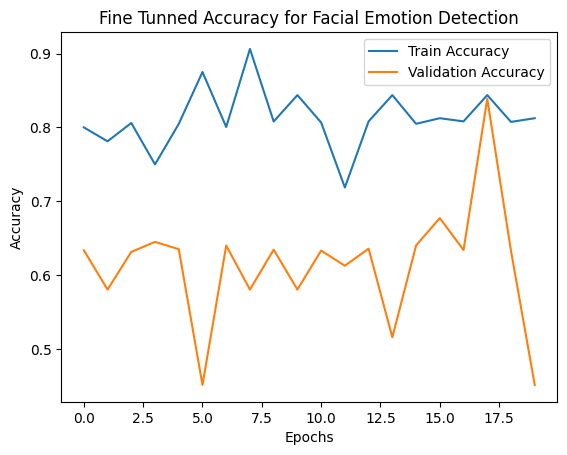

In [62]:

plt.plot(fine_tune_history.history['accuracy'], label='Train Accuracy')
plt.plot(fine_tune_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Fine Tunned Accuracy for Facial Emotion Detection')
plt.show()

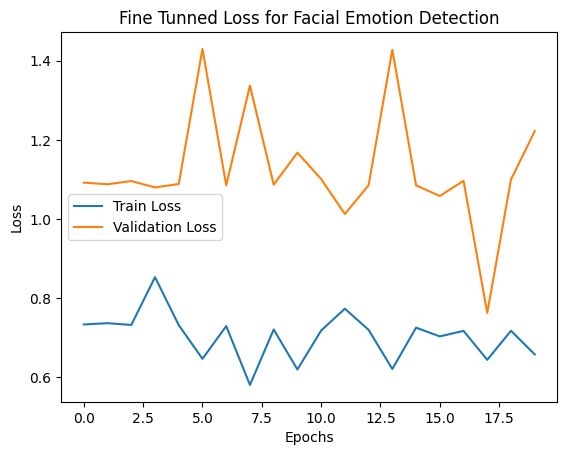

In [63]:

plt.plot(fine_tune_history.history['loss'], label='Train Loss')
plt.plot(fine_tune_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Fine Tunned Loss for Facial Emotion Detection')
plt.show()

In [64]:
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

228/228 ━━━━━━━━━━━━━━━━━━━━ 87s 379ms/step - accuracy: 0.6390 - loss: 1.0845
Test Accuracy: 63.91%


In [65]:
y_pred_emotion = model.predict(validation_generator)
y_pred_emotion = np.argmax(y_pred_emotion, axis=1)

228/228 ━━━━━━━━━━━━━━━━━━━━ 85s 374ms/step


In [66]:

model_save_path = '/content/drive/MyDrive/Data-Science-Projects/Facial-Emotion-andBody-Language/Models/emotion_finetuned_model_final1.h5'
model.save(model_save_path)
print("Fine-tuned VGG model saved successfully!")

Fine-tuned VGG model saved successfully!
